Cyber security Analysis 

In [50]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# read the cuber security data
df = pd.read_csv('Cybersecurity.csv')

In [52]:
# print the data head
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# Explore and Understand the data 

1. understand the data
2. Clean the data
3. Data visualization
4. Data analysis

In [53]:
# understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


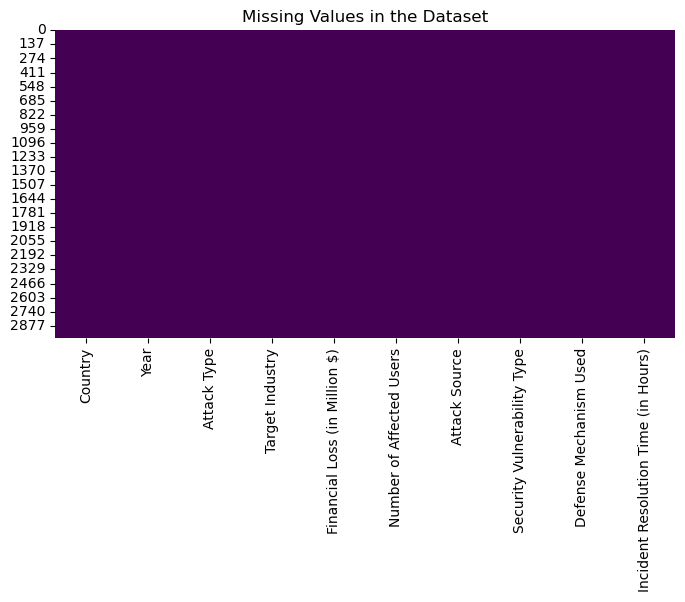

In [54]:
# plot the missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [55]:
# check the duplicates values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# Report after the data cleaning step
my data is clenaed we no need to cleaned it

In [56]:
Low_Unique = unique_counts[unique_counts < 10].index
Low_Unique

NameError: name 'unique_counts' is not defined

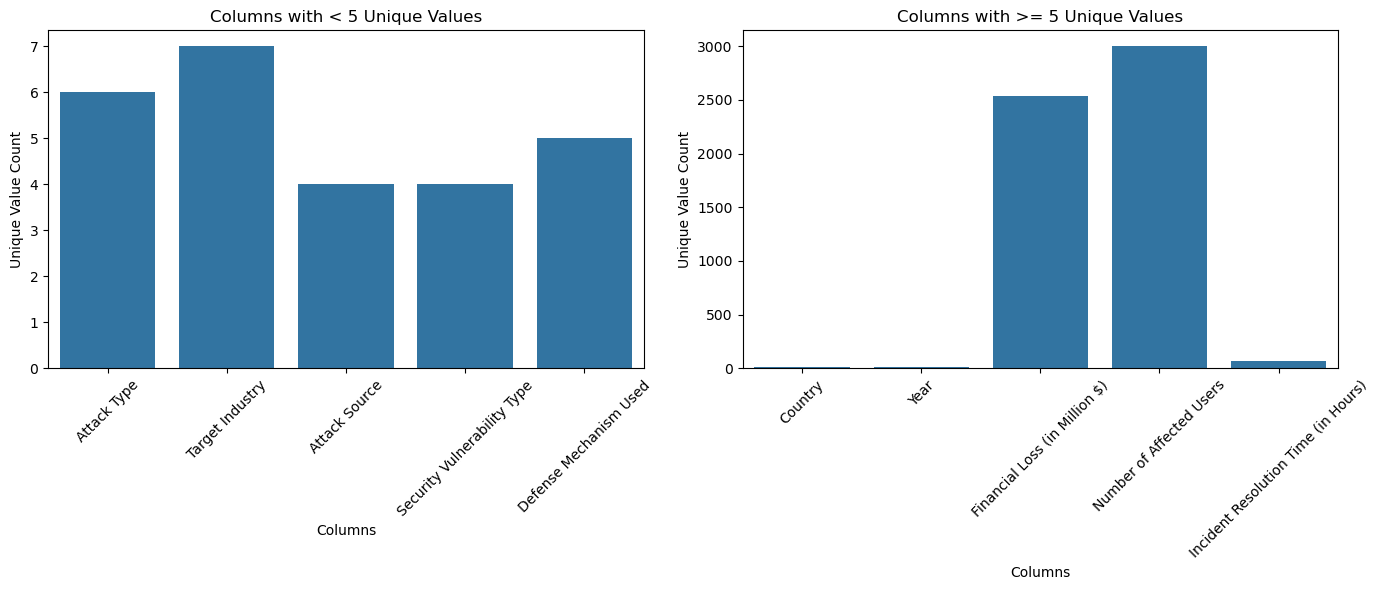

In [ ]:
    # Get the number of unique values for each column
unique_counts = df.nunique()

# Separate the columns based on the number of unique values
columns_less_than_5 = unique_counts[unique_counts < 10]
columns_more_than_5 = unique_counts[unique_counts >= 10]

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left side: columns with fewer than 5 unique values
sns.barplot(x=columns_less_than_5.index, y=columns_less_than_5.values, ax=axes[0])
axes[0].set_title('Columns with < 5 Unique Values')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Unique Value Count')
axes[0].tick_params(axis='x', rotation=45)

# Right side: columns with 5 or more unique values
sns.barplot(x=columns_more_than_5.index, y=columns_more_than_5.values, ax=axes[1])
axes[1].set_title('Columns with >= 5 Unique Values')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Unique Value Count')
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [ ]:
# summary statistics of the data
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


## Univarient Analysis

In [ ]:
# select the categoricl columns
categorical_columns = df.select_dtypes(include=['object']).columns


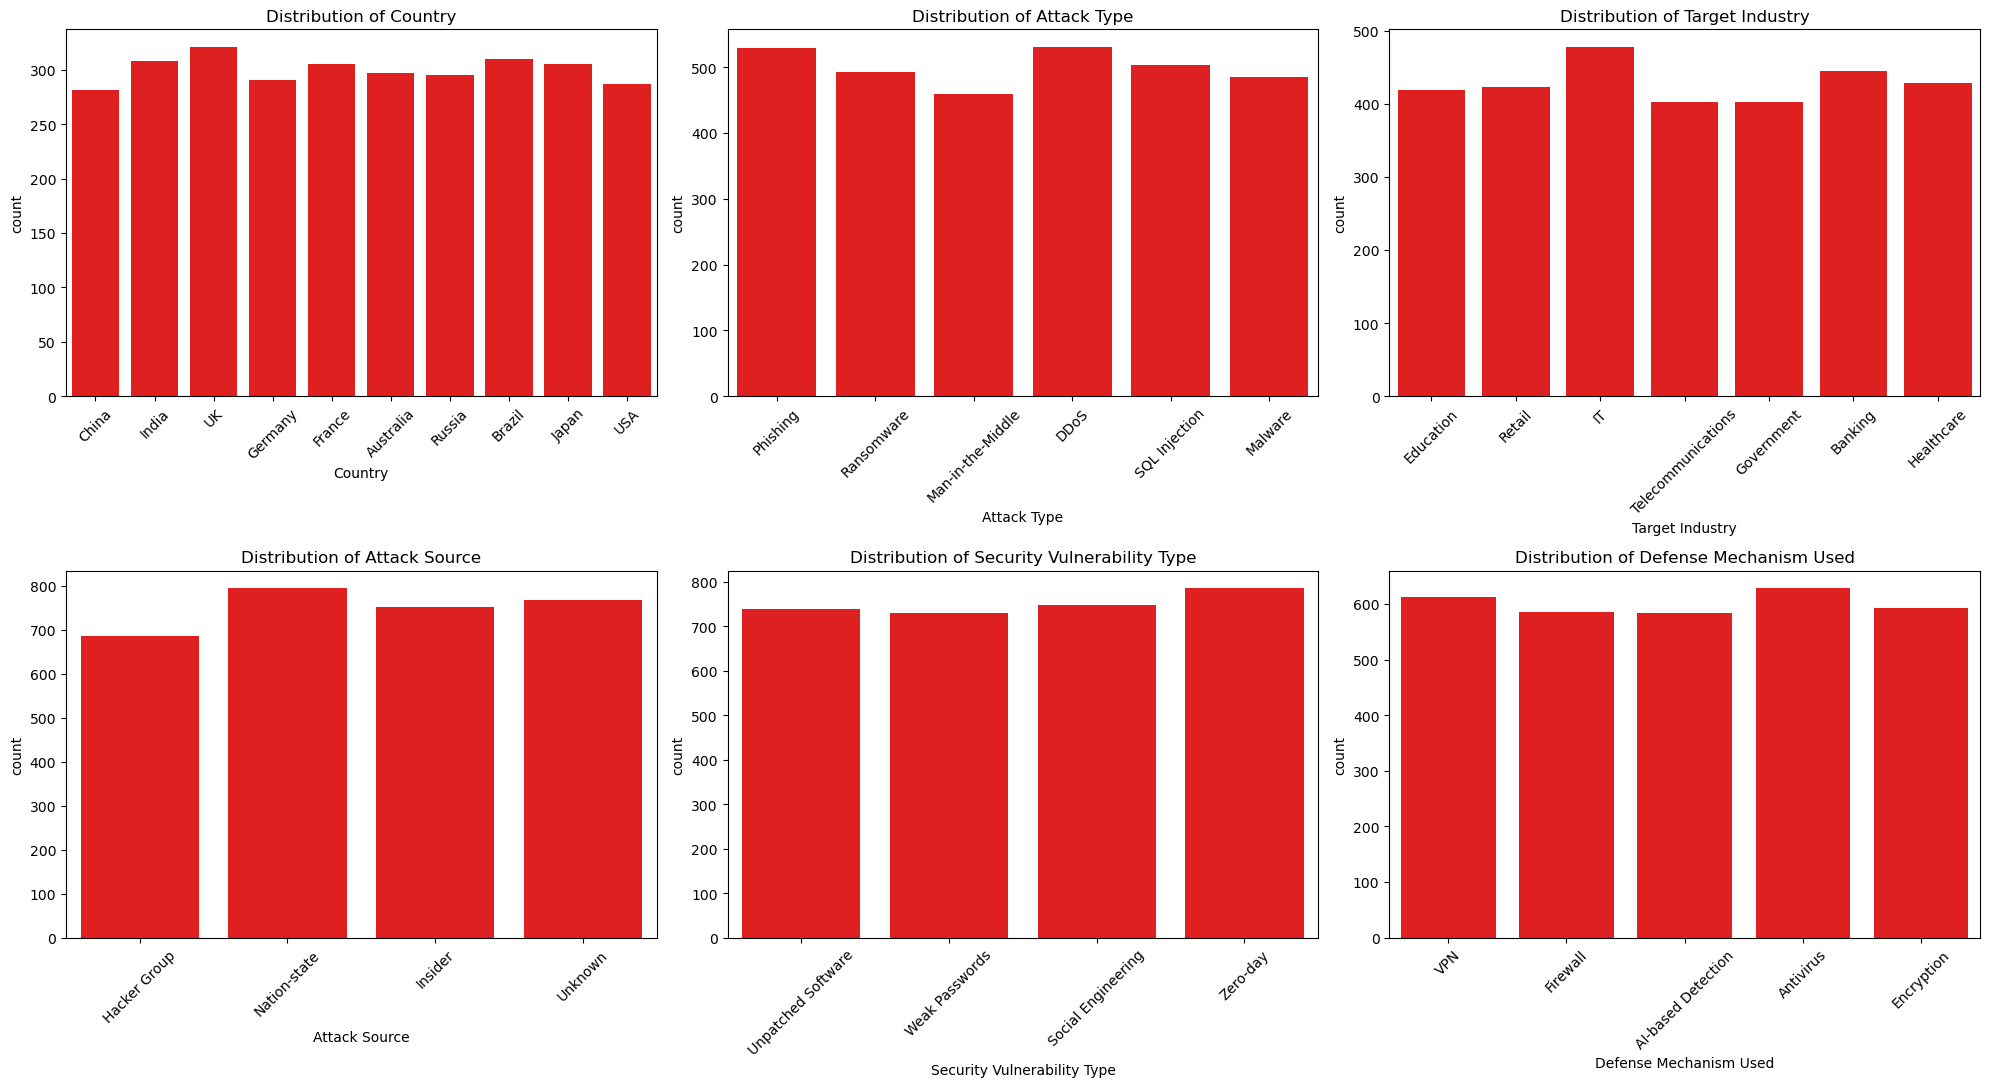

In [ ]:

rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  

axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color='red')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# If there are more subplots than columns, hide the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Attack Analysis:

Identify which countries or industries are most affected by cyber attacks.

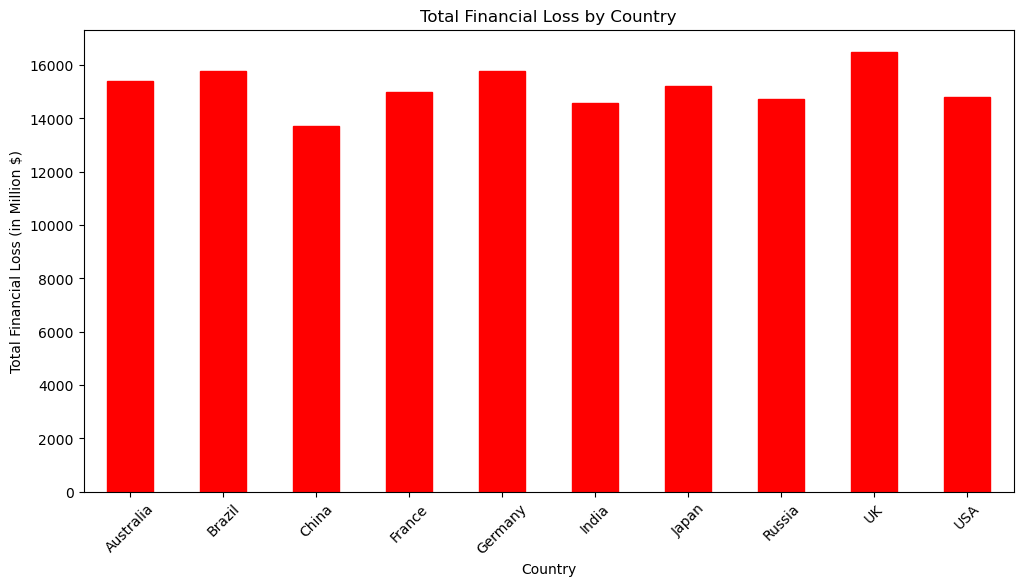

In [ ]:
df.groupby('Country')['Financial Loss (in Million $)'].sum().plot(kind='bar', figsize=(12, 6) , color='red', edgecolor='red')
# Set the title and labels
plt.title('Total Financial Loss by Country')
plt.xlabel('Country')
plt.ylabel('Total Financial Loss (in Million $)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


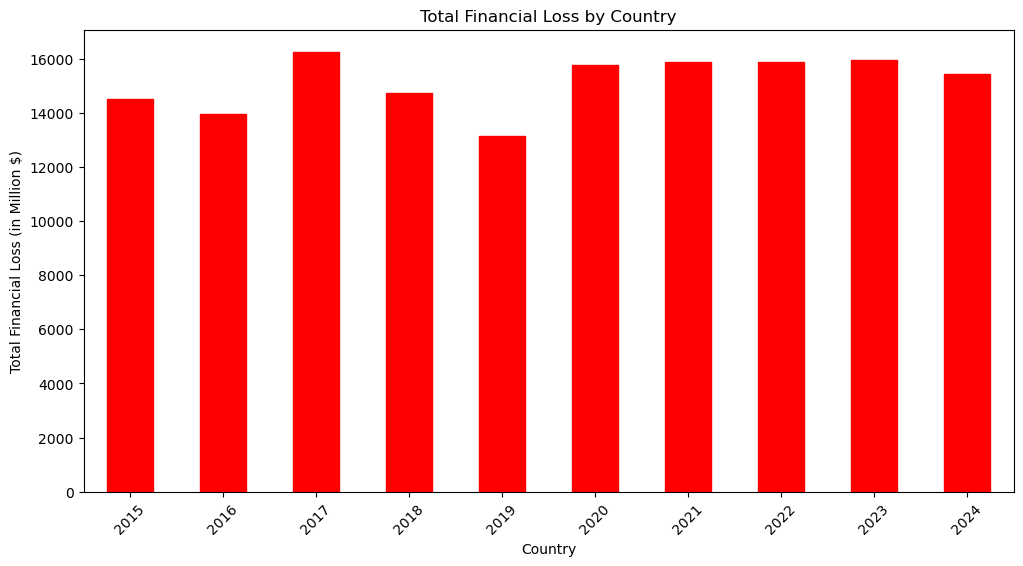

In [ ]:
df.groupby('Year')['Financial Loss (in Million $)'].sum().plot(kind='bar', figsize=(12, 6) , color='red', edgecolor='red')
# Set the title and labels
plt.title('Total Financial Loss by Country')
plt.xlabel('Country')
plt.ylabel('Total Financial Loss (in Million $)')
plt.xticks(rotation=45)
plt.show()


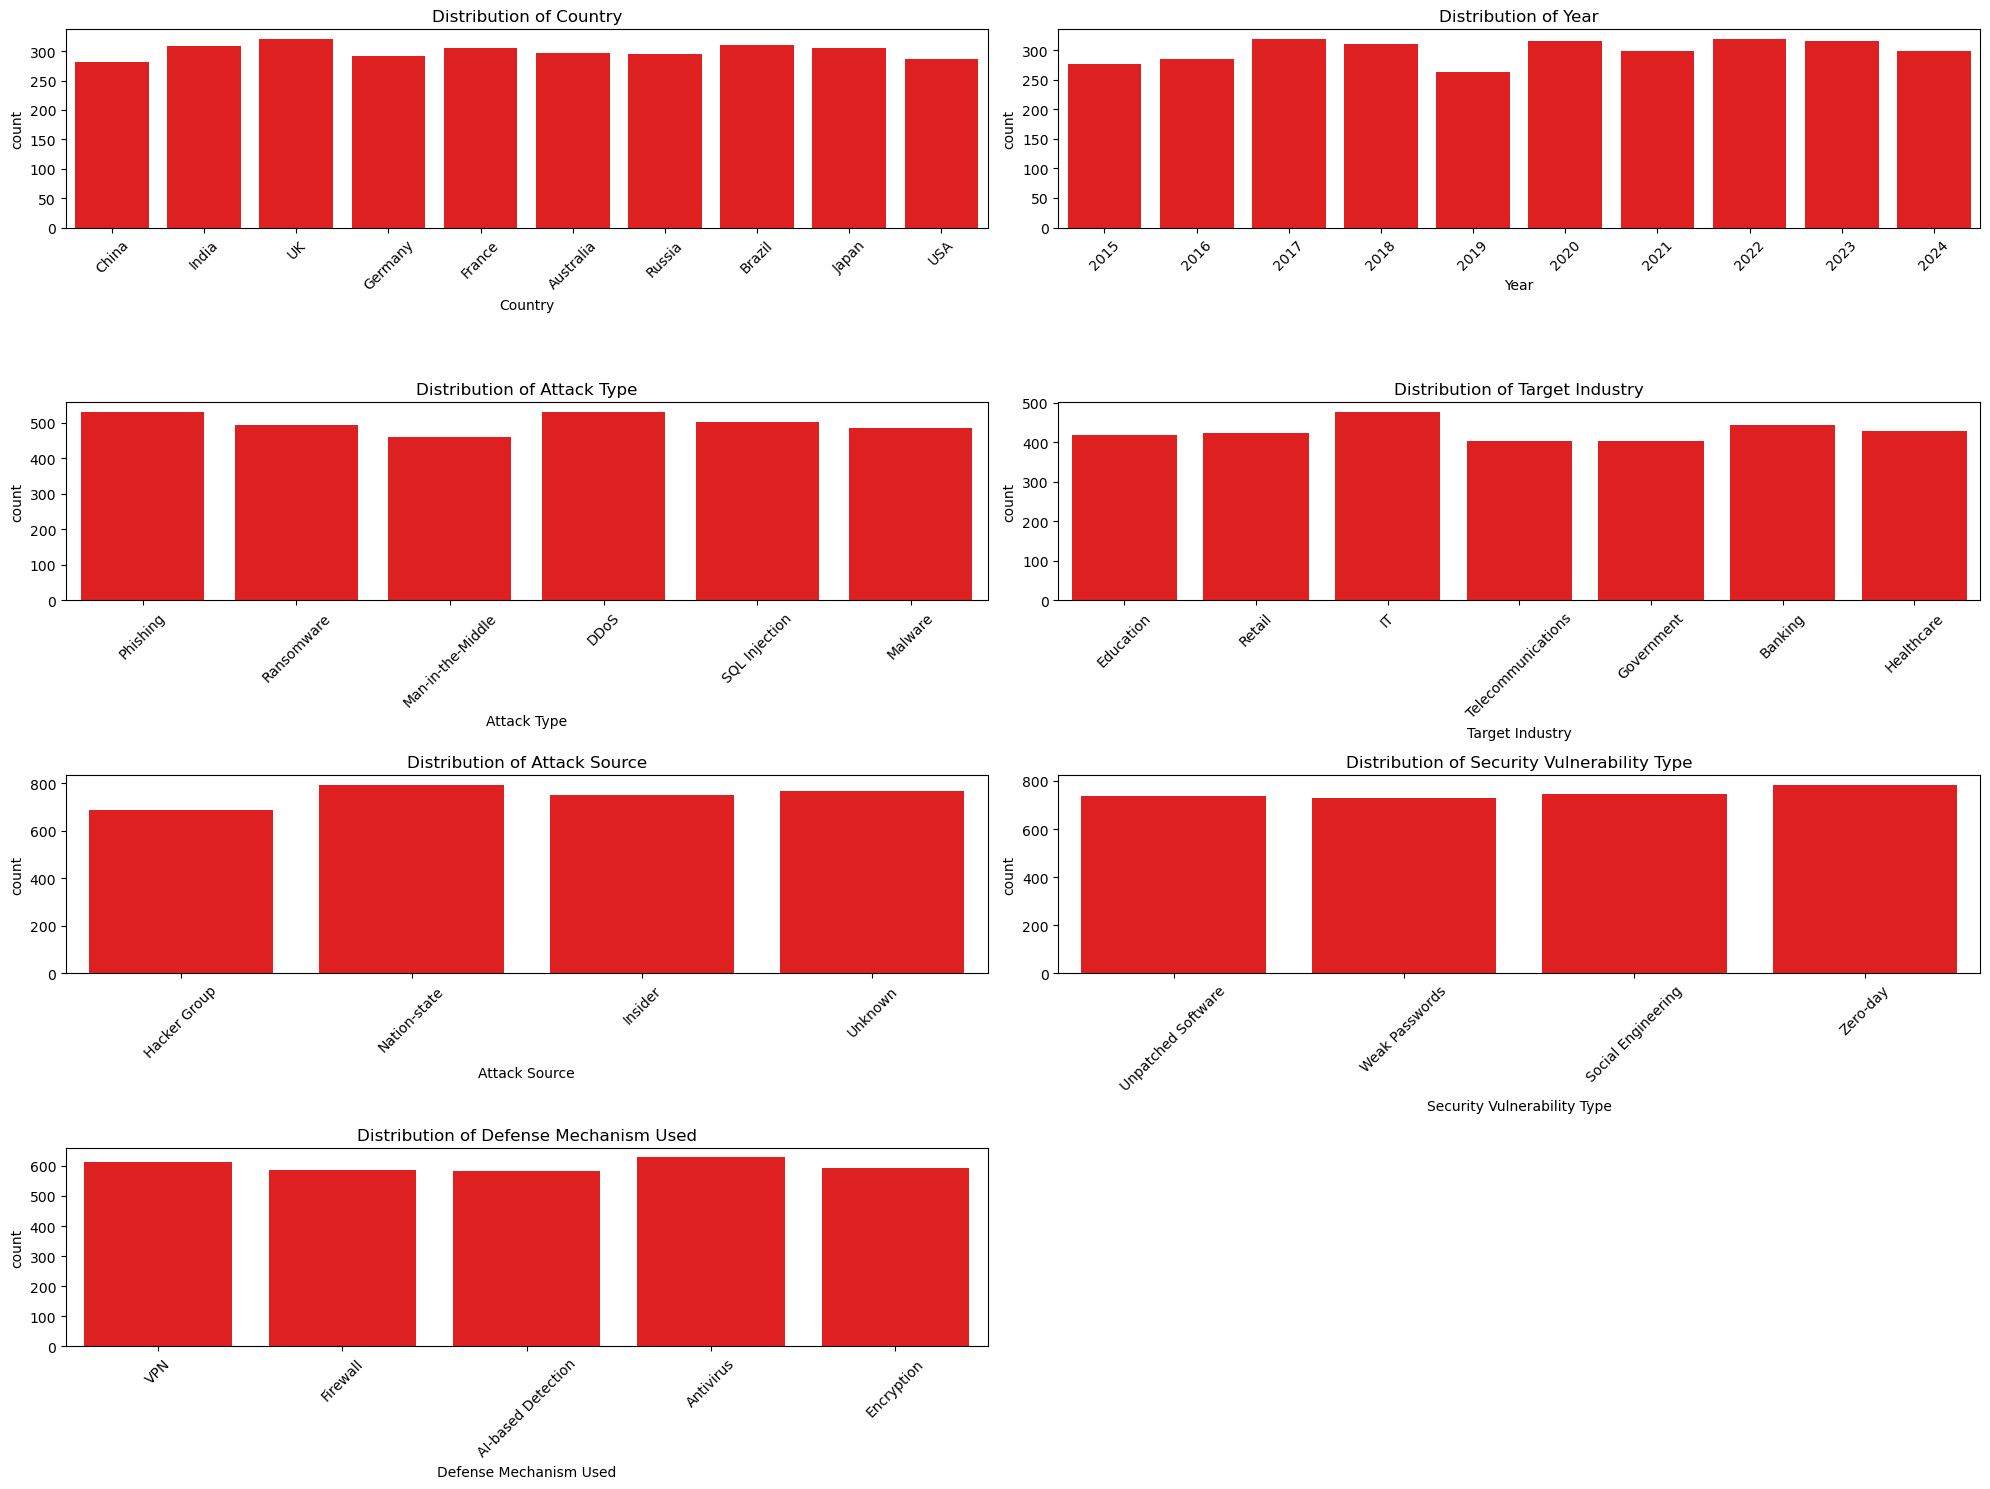

In [ ]:

categorical_columns = ['Country', 'Year', 'Attack Type', 'Target Industry', 
                       'Attack Source', 'Security Vulnerability Type', 
                       'Defense Mechanism Used']

# Set number of rows and columns
rows = 4
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # bigger figure

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color='red')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# If there are more subplots than columns, hide the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

# encode the categorical columns

In [ ]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
categorical_columns

['Country',
 'Year',
 'Attack Type',
 'Target Industry',
 'Attack Source',
 'Security Vulnerability Type',
 'Defense Mechanism Used']

In [ ]:
#select the string dtyoe columns 
string_columns = df.select_dtypes(include=['object']).columns

In [ ]:
string_columns

Index(['Country', 'Attack Type', 'Target Industry', 'Attack Source',
       'Security Vulnerability Type', 'Defense Mechanism Used'],
      dtype='object')

## OHE encoding

In [57]:
# import the preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# obejct of the OHE encoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = ohe.fit_transform(df[string_columns])

encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(string_columns))

# drop the original string columns from the dataframe
df = df.drop(columns=string_columns)
# concatenate the encoded columns with the original dataframe
df = pd.concat([df, encoded_df], axis=1)
# check the data after encoding
df.head()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,...,Attack Source_Insider,Attack Source_Nation-state,Attack Source_Unknown,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,2019,80.53,773169,63,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019,62.19,295961,71,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017,38.65,605895,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2024,41.44,659320,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,74.41,810682,68,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
